# Exploring Agency and Power in Hades/Persephone Fanfiction

This notebook helps you explore the Riveter-models of *power* and *agency* for fanfiction about the relationship between Hades and Persephone.

It offers the following functionalities:
- Get cumulative power and agency scores for each entity identified in the texts.
- See how many mentions have been grouped together under each entity, and which words they are.
- See which verbs contributed to the Riveter-scores for each persona and whether they contributed positively or negatively, visualize these scores in heatmaps.
- Create plots of power and agency scores for several persona so we can compare these scores easily through visualization.
- Turn Riveter-scores into a Pandas dataframe and save them as a .csv file.


Note: to protect the privacy of the fanfiction community, these Riveter-models do not contain the fanfiction texts themselves. As such, some of Riveter's functionalities cannot be demonstrated in this notebook. To find out more about these possibilities and to apply them to your own Riveter models, I refer you to Maria Antoniak's excellent demo notebooks, [available on Github](https://github.com/maartensap/riveter-nlp/tree/main/riveter).


### Setup

In [1]:
# importing the requirements

from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter

import seaborn as sns
import matplotlib.pyplot as plt
import pickle


# SPACY & COREF IMPORTS
import spacy
import spacy_experimental
nlp = spacy.load("en_core_web_sm")
nlp_coref = spacy.load("en_coreference_web_trf")

nlp_coref.replace_listeners("transformer", "coref", ["model.tok2vec"])
nlp_coref.replace_listeners("transformer", "span_resolver", ["model.tok2vec"])

nlp.add_pipe("coref", source=nlp_coref)
nlp.add_pipe("span_resolver", source=nlp_coref)

The folder this notebook is in also contains two Riveter-models:

hadper_power_redacted.pkl
hadper_agency_redacted.pkl

In the cell below, you will load both of these. 

In the code to follow, you can usually change 'power' to 'agency' to switch between the two models.

Note: both models are labeled 'redacted' because, to protect the privancy of the fanfiction community, they do not contain the actual texts of the fanfiction. 

In [2]:
with open("hadper_power_redacted.pkl", 'rb') as f:
    power = pickle.load(f)

In [3]:
with open("hadper_agency_redacted.pkl", 'rb') as f:
    agency = pickle.load(f)

### Cumulative Scores
You can use the .get_score_totals() function to get cumulative scores for either dynamic - power or agency - for each persona mentioned in the texts.

In [4]:
# a frequency threshold of 10 cleans up these results nicely
# leaving me with 721 entities for power and 807 for agency

power.get_score_totals(frequency_threshold=10)

{'she': -0.04419488769946476,
 'her': -0.06842105263157895,
 'heart': -0.02694610778443114,
 'anger': -0.007751937984496124,
 'aphrodite': 0.013438735177865613,
 'bed': -0.02486678507992895,
 'he': -0.0293661729245608,
 'them': -0.07518115942028986,
 'i': -0.021302998965873836,
 'you': 0.012682010333489901,
 'it': 0.0,
 'selene': 0.09433962264150944,
 'sister': -0.025,
 'moon': -0.0136986301369863,
 'zeus': 0.021634615384615384,
 'pandia': -0.0125,
 'all': -0.05150753768844221,
 'something': -0.07124895222129086,
 'magic': -0.12903225806451613,
 'peace': -0.1095890410958904,
 'water': -0.03908794788273615,
 'time': -0.02586206896551724,
 'girl': -0.054635761589403975,
 'father': -0.05255023183925812,
 'world': -0.02037617554858934,
 'end': -0.005390835579514825,
 'we': 0.06000638365783594,
 'odysseus': -0.05660377358490566,
 'someone': -0.0019305019305019305,
 'things': -0.05945945945945946,
 'me': -0.053737043098745226,
 'night': -0.035211267605633804,
 'telemachus': 0.0,
 'one': 0.00

### Entity Groupings

In [5]:
# You can use this code to check how many mentions have been associated with a given entity

len(power.get_persona_cluster('hades'))

4675

In [6]:
# you can also see which mentions they are

power.get_persona_cluster('hades')

{'hades': 1662,
 'hades stands': 8,
 'his fingers': 69,
 'hades to': 48,
 'his resolve': 2,
 'he does': 39,
 'hades will': 14,
 'his bride': 9,
 'hades and persephone snap': 1,
 'their attention': 1,
 'hades, who loves her,': 1,
 'his dark': 15,
 'he gives': 1,
 'his summerborn': 1,
 'hades has': 47,
 'his beautiful': 6,
 'he has': 35,
 'him.': 319,
 'his waiting': 1,
 'his own': 86,
 'hades would': 56,
 'he knew': 60,
 'hades walking': 1,
 'his palace': 12,
 'him taking': 2,
 'he was': 369,
 'he walked': 12,
 'his lean': 2,
 'his armor': 1,
 'he would': 114,
 'his kingdom': 16,
 'hades ran': 5,
 'his raven': 1,
 'he sat': 10,
 'his throne': 32,
 'his way': 27,
 'he had': 244,
 'he did': 117,
 'his duty': 3,
 'he always': 19,
 'he sighed': 9,
 'his legs': 11,
 'he glanced': 7,
 'his.': 27,
 'he thought': 22,
 'his dear': 2,
 'he got': 8,
 'hades.': 196,
 'his left': 2,
 'him staring': 3,
 'him on': 13,
 'he needed': 17,
 'his,': 22,
 'his with': 1,
 'you.': 40,
 'you going': 4,
 'hades

### Scores Per Persona

In [7]:
# We can see all the contributing verbs for all personas and whether they contributed positively or negatively.

power.get_persona_polarity_verb_count_dict()

{'divine lover': defaultdict(<function riveter.default_dict_int()>,
             {'positive': defaultdict(int, {'answer_dobj': 1})}),
 'she': defaultdict(<function riveter.default_dict_int()>,
             {'positive': defaultdict(int,
                          {'stop_nsubj': 26,
                           'turn_nsubj': 111,
                           'give_nsubj': 38,
                           'hear_dobj': 29,
                           'smell_dobj': 6,
                           'correct_nsubj': 3,
                           'clear_nsubj': 7,
                           'plant_nsubj': 5,
                           'like_dobj': 9,
                           'know_nsubj': 209,
                           'want_dobj': 22,
                           'wake_nsubj': 7,
                           'pick_nsubj': 18,
                           'expect_nsubj': 12,
                           'spend_nsubj': 10,
                           'tilt_nsubj': 16,
                           'lower_nsubj': 6

In [8]:
# And we can view these scores for each persona and visualze them in a heatmap.

# In the following heatmap, each cell contains the count of matching verbs for the persona 
# that contributed either positively or negatively to its final score. 

power.plot_verbs_for_persona('spring')

### Plotting Scores

/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


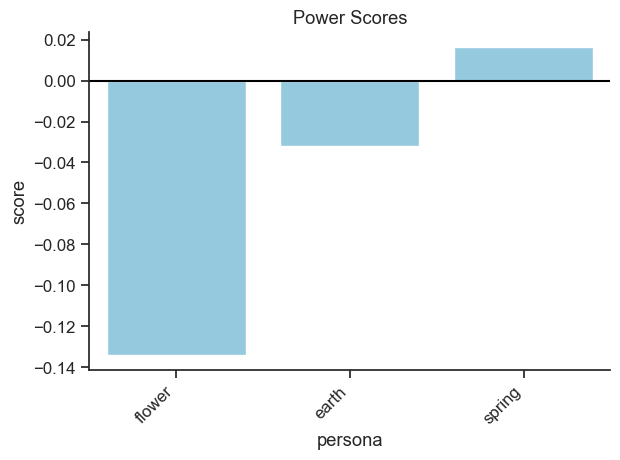

In [27]:
#You can use the .plot_scores() function to display a bar plot with the top n or bottom n personas in the texts.
#The function will display the top 10 highest-scoring personas by default.

# riveter.plot_scores()
# or: riveter.plot_scores(2)
power.plot_scores(title='Power Scores', target_personas= ['flower', 'earth','spring'])

/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


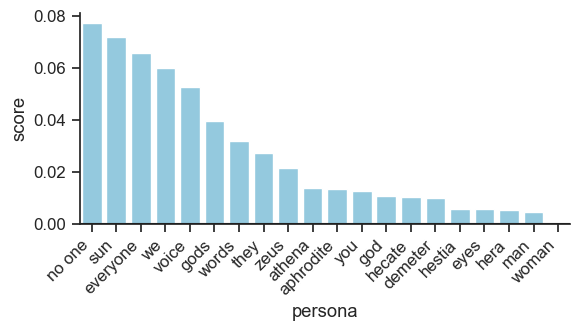

In [17]:
# you can customize these plots and save them:
power.plot_scores(title='', 
                    frequency_threshold=100, 
                    number_of_scores=20, 
                    figsize=(6,3.5))
                    #output_path='/Users/mariaa/Desktop/barplot.pride_and_prejudice.most_power.pdf')

/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


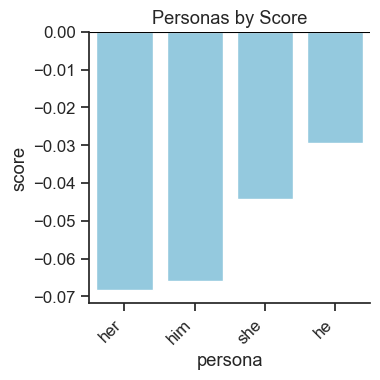

In [47]:
power.plot_scores(title='Personas by Score', target_personas=['he', 'him', 'she', 'her'], figsize=(4, 4))

### Turning results into a Pandas Dataframe and saving them to a .csv file

Note that Riveter-scores can be skewed by infrequent entities. If an entity occurs just once in a text, but it has power in that context, it will be assigned a power-score of 1 even though that is almost impossible to achieve for very frequent entities. Keep this in mind when interpreting results. You can also set a frequency threshold (as illustrated above) to narrow your results down.

In [40]:
# a dataframe of power scores for each persona

persona_power = pd.DataFrame(power.get_score_totals().items(), columns = ["persona", "score"],).sort_values(by = "score")

In [46]:
# a dataframe of the 'Persephone' persona cluster and its power-scores.
persephone_power = pd.DataFrame(power.get_persona_cluster('persephone').items(), columns = ["persona", "score"],).sort_values(by = "score")

In [44]:
# you can check the first few lines
persona_power.head()

,persona,score
8404,fruit plate,-1.0
6036,athena tighter,-1.0
15529,both doors,-1.0
15528,idiotic piece,-1.0
13403,filthy flesh,-1.0


In [45]:
# To save any dataframe to a csv:
# change 'persephone_power' to whatever you named your dataframe
# change the word 'data' to whatever you want to name your cscv

persephone_power.to_csv('data.csv', index=False)